In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!pip install pyunpack
!pip install patool 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 77 kB 2.4 MB/s 


In [ ]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
import random
import math
from scipy.spatial import distance
from sklearn.metrics import mean_squared_error
from pyunpack import Archive

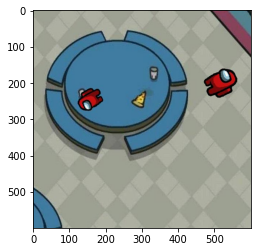

In [5]:
image = cv2.imread("/content/drive/MyDrive/AmongUsCounter/DataSet/DataSet1/img0.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.imshow(image)
plt.show()

# Among Us Counter

Close color to visor


In [6]:
""""
def closeColor(colors,pixel):
  for i in range(len(colors)):
    if distance.euclidean(list(colors[i]),list(pixel)) < 20:
      return True
  return False
  
colors = { 0: (255,255,255),   # "Light Visor"
          1: (150,200,200), # "Dark Visor"
           2: (200,20,20),   # "Red"
           3: (110,10,10)   # "Dark Red"
}     

def countAmongUs(image_RGB):
  image = image_RGB
  visor = np.zeros((image.shape[0],image.shape[1]))
  body = np.zeros((image.shape[0],image.shape[1]))

  #TOO Looooooooooooooooooooong
  for i in range(image.shape[0]):
    for j in range(image.shape[1]):
      if closeColor([colors[0],colors[1]],image[i,j,:]):
        visor[i,j] = 255
      if closeColor([colors[2],colors[3]],image[i,j,:]):
        body[i,j] = 255

  plt.imshow(visor, cmap="gray")
  plt.show()
  plt.imshow(body, cmap="gray")
  plt.show()

  com = cv2.add(visor, body) 

  kernel = np.ones((5,5),np.uint8)
  com = cv2.dilate(com,kernel,iterations = 2) 
  com = com.astype(np.uint8)

  # plt.imshow(com, cmap="gray")
  # plt.show()

  (num_labels, labels, stats, centroids) = cv2.connectedComponentsWithStats(com, 8, cv2.CV_32S)
  #print(stats)

  countNum = num_labels -1
  # for eachCom in stats:
  #   if 300 <= eachCom[4] and eachCom[4] < 1000:
  #     countNum += 1

  return countNum
"""

'\ndef closeColor(colors,pixel):\n  for i in range(len(colors)):\n    if distance.euclidean(list(colors[i]),list(pixel)) < 20:\n      return True\n  return False\n  \ncolors = { 0: (255,255,255),   # "Light Visor"\n          1: (150,200,200), # "Dark Visor"\n           2: (200,20,20),   # "Red"\n           3: (110,10,10)   # "Dark Red"\n}     \n\ndef countAmongUs(image_RGB):\n  image = image_RGB\n  visor = np.zeros((image.shape[0],image.shape[1]))\n  body = np.zeros((image.shape[0],image.shape[1]))\n\n  #TOO Looooooooooooooooooooong\n  for i in range(image.shape[0]):\n    for j in range(image.shape[1]):\n      if closeColor([colors[0],colors[1]],image[i,j,:]):\n        visor[i,j] = 255\n      if closeColor([colors[2],colors[3]],image[i,j,:]):\n        body[i,j] = 255\n\n  plt.imshow(visor, cmap="gray")\n  plt.show()\n  plt.imshow(body, cmap="gray")\n  plt.show()\n\n  com = cv2.add(visor, body) \n\n  kernel = np.ones((5,5),np.uint8)\n  com = cv2.dilate(com,kernel,iterations = 2) \n  com

In [7]:
colors = { 0: np.array((255,255,255)),   # "Light Visor"
           1: np.array((150,200,220)), # "Dark Visor"
           2: np.array((200,20,20)),   # "Red"
           3: np.array((110,10,10))   # "Dark Red"
}  

def closePixel(image,color,threshold = 20):
  imdif = image - color.reshape((1,1,3))
  imdif **= 2
  dist = np.sqrt(np.sum(imdif,axis = 2))
  return dist < threshold

def countAmongUs(image,showPic=False):
  #1. Detect Visor Area
  visor = np.zeros((image.shape[0],image.shape[1]))
  # body = np.zeros((image.shape[0],image.shape[1]))

  # isLightVisor = closePixel(image,colors[0])
  isDarkVisor = closePixel(image,colors[1])

  # isRed = closePixel(image,colors[2])
  # isDarkRed = closePixel(image,colors[3])

  visor[isDarkVisor] = 255 #isLightVisor |
  # body[isRed | isDarkRed] = 255

  if(showPic):
    plt.imshow(visor, cmap="gray")
    plt.show()
    # plt.imshow(body, cmap="gray")
    # plt.show()

  #2. Erode & Dilate
  kernel = np.ones((3,3),np.uint8)
  kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(5,5))
  visor = cv2.dilate(visor,kernel,iterations = 2)
  visor = cv2.erode(visor,kernel,iterations = 1)
  visor = visor.astype(np.uint8)

  kernel = np.ones((3,3),np.uint8)
  com = visor #cv2.add(visor, body) 
  com = cv2.dilate(com,kernel,iterations = 1) 
  com = com.astype(np.uint8)

  if(showPic):
    plt.imshow(com, cmap="gray")
    plt.show()

  #3. connectedComponentsWithStats
  (num_labels, labels, stats, centroids) = cv2.connectedComponentsWithStats(com, 8, cv2.CV_32S)
  if(showPic):
    print(stats)

  #4. Count Crewmate
  countNum = 0
  for eachCom in stats:
     if 150 <= eachCom[4] and eachCom[4] < 2000:
       countNum += 1

  return countNum

In [8]:
def getNumberOfAmongUs(dataPath):
  count_text = open(dataPath + "/count.txt", "r")
  numberOfAmongUs = dict()
  for line in count_text:
    imgNo, num = line.split()
    imgNo, num = int(imgNo), int(num)
    numberOfAmongUs[imgNo] = num
  count_text.close()
  return numberOfAmongUs

def assertRandomPercentage(dataPath,percentage,showMod=1):
  numberOfAmongUs = getNumberOfAmongUs(dataPath)
  print("Number of dataset = %d" %(len(numberOfAmongUs)))

  numberCheck = int(len(numberOfAmongUs)*percentage) #Number of images to test
  numList = sorted(random.sample(range(len(numberOfAmongUs)), numberCheck)) #Random sample image number 
  print(numList)

  correct = 0
  error_list = []

  for i in range(len(numList)):
    image = cv2.imread(dataPath + ("/img%d.jpg" % numList[i]))
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    #Use Function to countAmongUs
    c = countAmongUs(image)
    error = c - numberOfAmongUs[numList[i]]
    error_list.append(error)
    if(error==0):
      correct += 1
      if(i%showMod==0):
        print("%3d/%3d  ImageNo. %3d  \t Counter = %2d  [Correct]" % (i+1,numberCheck,numList[i],c))
    else:
      if(i%showMod==0):
        print("%3d/%3d  ImageNo. %3d  \t Counter = %2d  > %d" % (i+1,numberCheck,numList[i],c,error))
  print("%d/%d = %.2f%%" % (correct,numberCheck,correct/numberCheck * 100))

  rms = mean_squared_error(np.array(error_list), np.zeros((len(error_list))), squared=False)
  print("Root Mean Squared Error = %.4f" % rms)

# Dataset 1
Simple dataset

Only red crewmate and one animation

In [9]:
assertRandomPercentage("/content/drive/MyDrive/AmongUsCounter/DataSet/DataSet1",1,showMod=100)

Number of dataset = 387
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 

3


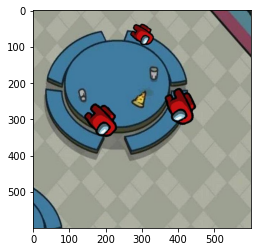

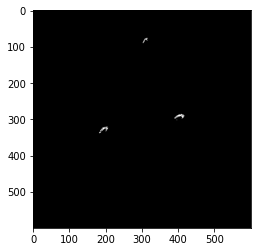

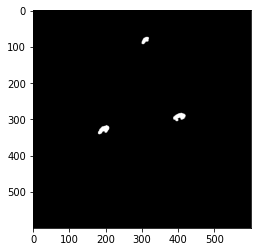

[[     0      0    600    600 358797]
 [   299     74     20     20    254]
 [   386    283     34     23    486]
 [   179    317     31     25    463]]
3 3
Time Taken:0.7293713092803955


In [10]:
from time import time

numberOfAmongUs = getNumberOfAmongUs("/content/drive/MyDrive/AmongUsCounter/DataSet/DataSet1")
t1 = time()
r = 3 #random.randint(0,len(numberOfAmongUs)-1)
print(r)
image = cv2.imread("/content/drive/MyDrive/AmongUsCounter/DataSet/DataSet1/img%d.jpg" % r)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.imshow(image)
plt.show()

print(countAmongUs(image,showPic=True),numberOfAmongUs[r])
t2 = time()
print(f'Time Taken:{t2-t1}')

# Dataset 3 (Zip)
Various color/animation crewmates with shadow

In [11]:
import zipfile

path_to_zip_file = "/content/drive/MyDrive/AmongUsCounter/DataSet/DataSet3/set6.zip"
directory_to_extract_to = "/content/DataSet3"
with zipfile.ZipFile(path_to_zip_file, 'r') as zip_ref:
    zip_ref.extractall(directory_to_extract_to)

In [12]:
assertRandomPercentage("/content/DataSet3",0.10,showMod=100)

Number of dataset = 1505
[0, 18, 25, 39, 50, 64, 71, 77, 88, 89, 105, 142, 144, 147, 166, 174, 175, 191, 205, 210, 227, 228, 229, 247, 277, 279, 288, 308, 312, 313, 314, 321, 326, 364, 374, 384, 387, 430, 434, 435, 436, 440, 453, 454, 460, 476, 478, 481, 494, 497, 501, 504, 524, 539, 557, 595, 601, 604, 618, 620, 622, 629, 643, 645, 648, 656, 662, 674, 680, 684, 687, 695, 704, 708, 709, 712, 722, 735, 761, 844, 854, 858, 860, 861, 877, 885, 890, 894, 897, 900, 914, 916, 935, 952, 960, 963, 966, 1000, 1008, 1017, 1021, 1030, 1038, 1040, 1056, 1058, 1075, 1084, 1089, 1102, 1105, 1109, 1110, 1125, 1132, 1148, 1159, 1167, 1205, 1215, 1219, 1228, 1234, 1245, 1250, 1258, 1261, 1263, 1292, 1293, 1296, 1302, 1313, 1345, 1366, 1405, 1410, 1413, 1414, 1415, 1421, 1430, 1432, 1434, 1454, 1464, 1474, 1479, 1489, 1500]
  1/150  ImageNo.   0  	 Counter =  4  [Correct]
101/150  ImageNo. 1021  	 Counter =  1  [Correct]
111/150 = 74.00%
Root Mean Squared Error = 0.9764


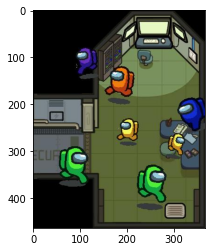

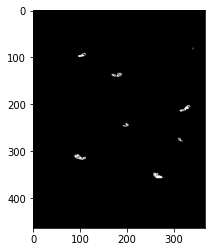

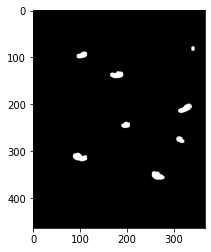

[[     0      0    366    464 167770]
 [   337     77      7     10     62]
 [    93     88     22     15    236]
 [   164    130     28     15    319]
 [   309    199     29     20    337]
 [   188    238     18     13    187]
 [   305    269     17     14    175]
 [    85    304     30     18    385]
 [   253    343     27     18    353]]
7 7


In [13]:
numberOfAmongUs = getNumberOfAmongUs("/content/DataSet3")
r = 40
image = cv2.imread("/content/DataSet3/img%d.jpg" % r)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.imshow(image)
plt.show()

print(countAmongUs(image,showPic=True),numberOfAmongUs[r])

# Dataset 4

Various color/animation crewmates are available

no shadow under crewmates

does not allow overlap / out of bound

In [14]:
!mkdir /content/DataSet4

In [15]:
path_to_zip_file = "/content/drive/MyDrive/AmongUsCounter/DataSet/DataSet4/for_test.rar"
directory_to_extract_to = "/content/DataSet4"
Archive(path_to_zip_file).extractall(directory_to_extract_to)

In [16]:
assertRandomPercentage("/content/DataSet4/set9",1.00,showMod=100)

Number of dataset = 601
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 

# Dataset 5

Various color/animation crewmates are available

no shadow under crewmates

allow minor overlap / out of bounds

In [17]:
!mkdir /content/DataSet5

In [18]:
path_to_zip_file = "/content/drive/MyDrive/AmongUsCounter/DataSet/DataSet5/for_test.rar"
directory_to_extract_to = "/content/DataSet5"
Archive(path_to_zip_file).extractall(directory_to_extract_to)

In [19]:
assertRandomPercentage("/content/DataSet5/set12",1.00,showMod=100)

Number of dataset = 600
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 